In [100]:
import pandas as pd
import  numpy as np

df = pd.read_csv('synthetic_heart_disease_dataset.csv')
df.head()

,Age,Gender,Weight,Height,BMI,Smoking,Alcohol_Intake,Physical_Activity,Diet,Stress_Level,...,Diabetes,Hyperlipidemia,Family_History,Previous_Heart_Attack,Systolic_BP,Diastolic_BP,Heart_Rate,Blood_Sugar_Fasting,Cholesterol_Total,Heart_Disease
0,48,Male,78,157,26.4,Never,NaN,Sedentary,Healthy,Medium,...,0,1,1,0,104,99,71,165,200,0
1,35,Female,73,163,33.0,Never,Low,Active,Average,High,...,0,1,1,0,111,72,60,145,206,0
2,79,Female,88,152,32.3,Never,NaN,Moderate,Average,Medium,...,0,0,1,0,116,102,78,148,208,0
3,75,Male,106,171,37.4,Never,Moderate,Moderate,Average,Low,...,0,1,0,0,171,92,109,105,290,1
4,34,Female,65,191,18.5,Current,NaN,Sedentary,Healthy,Low,...,1,0,0,0,164,67,108,116,220,1


In [101]:

df  = df.dropna() 
df

,Age,Gender,Weight,Height,BMI,Smoking,Alcohol_Intake,Physical_Activity,Diet,Stress_Level,...,Diabetes,Hyperlipidemia,Family_History,Previous_Heart_Attack,Systolic_BP,Diastolic_BP,Heart_Rate,Blood_Sugar_Fasting,Cholesterol_Total,Heart_Disease
1,35,Female,73,163,33.0,Never,Low,Active,Average,High,...,0,1,1,0,111,72,60,145,206,0
3,75,Male,106,171,37.4,Never,Moderate,Moderate,Average,Low,...,0,1,0,0,171,92,109,105,290,1
6,67,Male,93,158,22.3,Never,Moderate,Moderate,Unhealthy,Low,...,0,0,0,0,153,82,85,145,156,1
9,74,Male,106,197,35.7,Current,Low,Moderate,Unhealthy,Low,...,0,0,0,0,114,69,87,117,195,0
10,38,Male,52,160,34.7,Current,High,Sedentary,Average,Low,...,0,0,1,0,106,102,67,116,284,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,39,Female,58,195,18.1,Never,High,Moderate,Average,Medium,...,0,0,0,0,111,105,80,141,160,0
49996,53,Male,95,163,35.8,Never,Low,Moderate,Healthy,Low,...,0,1,0,0,141,96,70,148,252,0
49997,38,Female,91,197,32.3,Former,Low,Moderate,Unhealthy,Low,...,0,0,0,0,178,94,90,75,235,0
49998,68,Male,115,152,18.6,Never,High,Moderate,Average,Medium,...,0,0,0,0,118,110,106,113,177,0


In [102]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Alcohol_Intake'] = le.fit_transform(df['Alcohol_Intake'])
df['Smoking'] = le.fit_transform(df['Smoking'])
df['Physical_Activity'] = le.fit_transform(df['Physical_Activity'])
df['Diet'] = le.fit_transform(df['Diet'])
df['Stress_Level'] = le.fit_transform(df['Stress_Level'])

In [103]:
# Gender Transformation
gender_dummies_single = pd.get_dummies(df['Gender'], prefix='Gender', drop_first=True)

# Apply get_dummies directly to the string column
gender_dummies = pd.get_dummies(df['Gender'], prefix='Gender')

# Concatenate the new columns with the original DataFrame
df = pd.concat([df, gender_dummies], axis=1)

# Drop the original 'Gender' column if you no longer need it
df = df.drop('Gender', axis=1)

# Transform New Gender columns to integers
df['Gender_Male'] = df['Gender_Male'].astype(int)
df['Gender_Female'] = df['Gender_Female'].astype(int)

In [104]:
df

,Age,Weight,Height,BMI,Smoking,Alcohol_Intake,Physical_Activity,Diet,Stress_Level,Hypertension,...,Family_History,Previous_Heart_Attack,Systolic_BP,Diastolic_BP,Heart_Rate,Blood_Sugar_Fasting,Cholesterol_Total,Heart_Disease,Gender_Female,Gender_Male
1,35,73,163,33.0,2,1,0,0,0,1,...,1,0,111,72,60,145,206,0,1,0
3,75,106,171,37.4,2,2,1,0,1,0,...,0,0,171,92,109,105,290,1,0,1
6,67,93,158,22.3,2,2,1,2,1,1,...,0,0,153,82,85,145,156,1,0,1
9,74,106,197,35.7,0,1,1,2,1,0,...,0,0,114,69,87,117,195,0,0,1
10,38,52,160,34.7,0,0,2,0,1,0,...,1,0,106,102,67,116,284,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,39,58,195,18.1,2,0,1,0,2,0,...,0,0,111,105,80,141,160,0,1,0
49996,53,95,163,35.8,2,1,1,1,1,0,...,0,0,141,96,70,148,252,0,0,1
49997,38,91,197,32.3,1,1,1,2,1,0,...,0,0,178,94,90,75,235,0,1,0
49998,68,115,152,18.6,2,0,1,0,2,0,...,0,0,118,110,106,113,177,0,0,1


In [105]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"column '{col}' contains string values. Please convert them to numeric values before proceeding.")

In [106]:
corr_matrix = df.corr()

<Axes: >

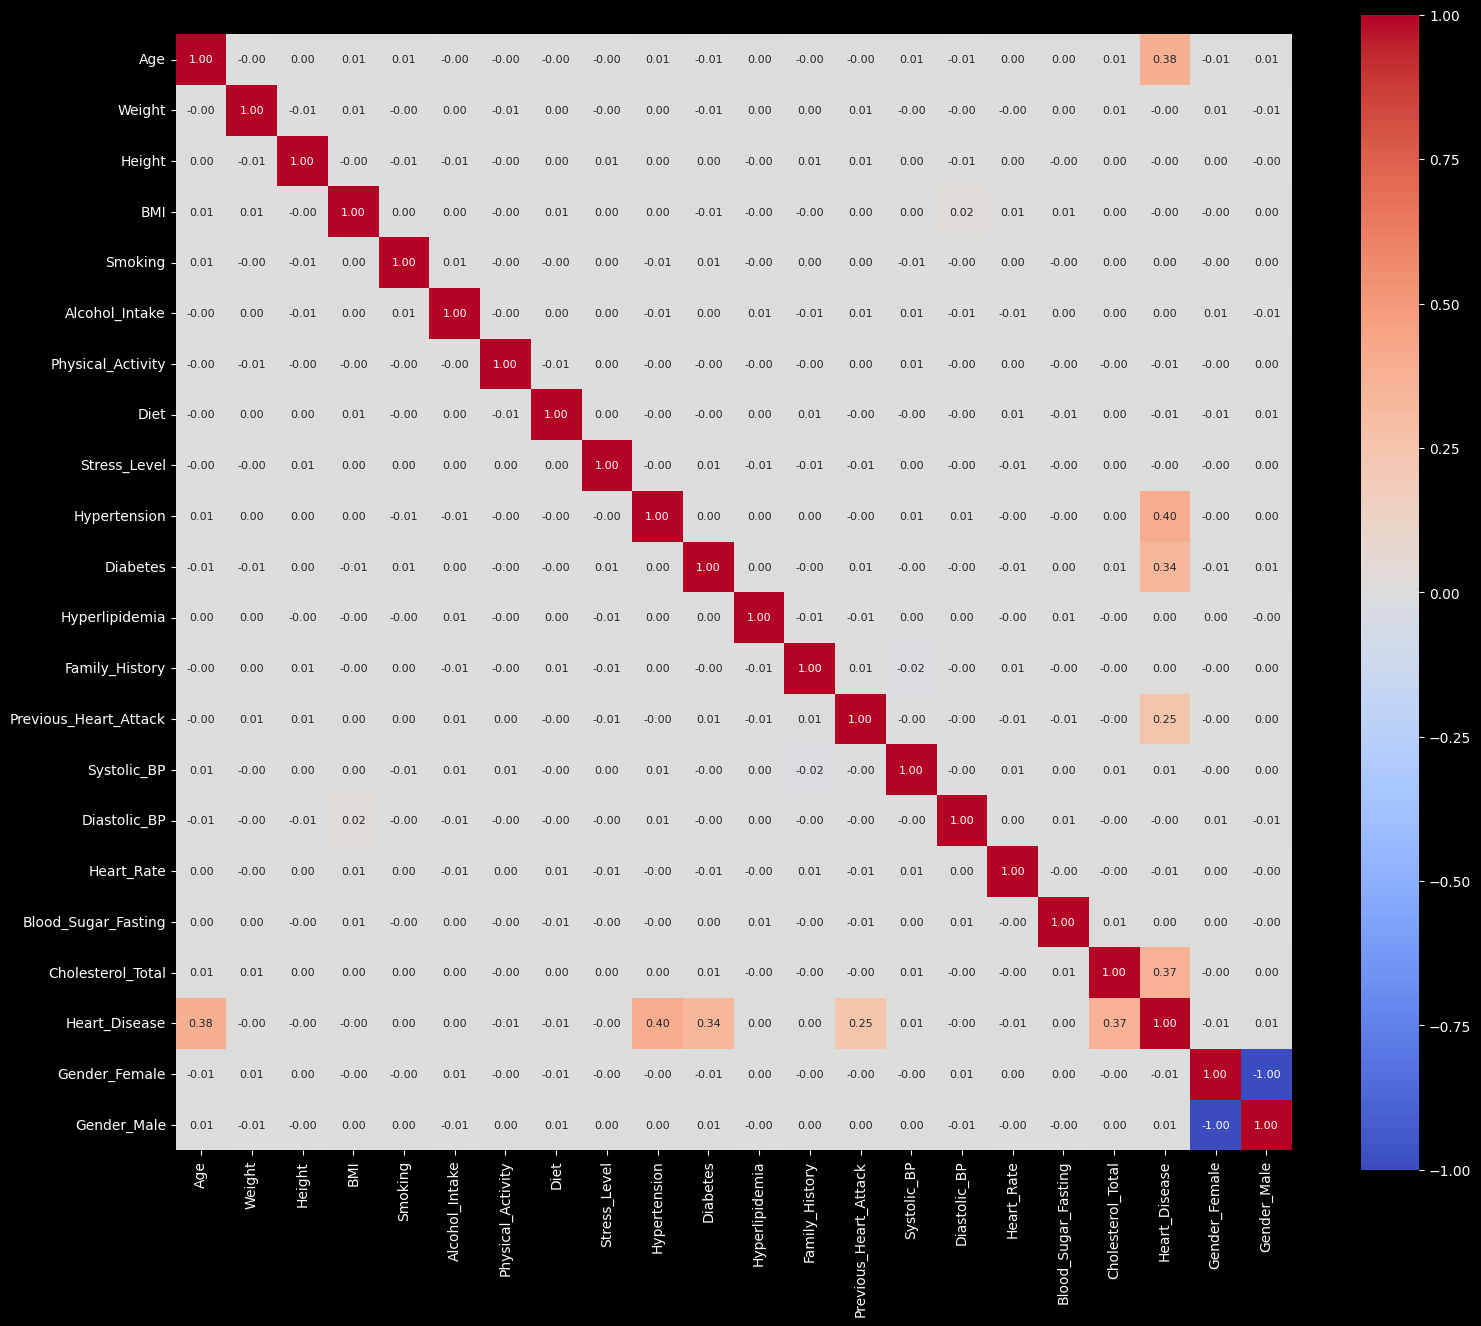

In [107]:
# for Heatmap 

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 15))
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            cbar=True,
            square=True,
            annot_kws={"size": 8}
            )

In [108]:
# train the dataset 

from sklearn.model_selection import train_test_split
x = df.drop('Heart_Disease', axis=1)
y= df['Heart_Disease']
x_trained, x_val, y_trained, y_val = train_test_split(x, y, test_size=0.2, random_state=42) 
x_train, x_test, y_train, y_test = train_test_split(x_trained, y_trained, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2
print("x_train shape:", x_train.shape)
print("x_val_shape:", x_val.shape)
print("x_test shape:", x_test.shape)

x_train shape: (17934, 21)
x_val_shape: (5979, 21)
x_test shape: (5978, 21)


In [109]:
# Scale the dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

In [110]:
x_train_scaled.shape

(17934, 21)

In [111]:
import statsmodels.api as sm

x_train_sm = sm.add_constant(x_train_scaled)
logit_model = sm.Logit(y_train, x_train_sm).fit()
result = logit_model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.165376
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Heart_Disease   No. Observations:                17934
Model:                          Logit   Df Residuals:                    17913
Method:                           MLE   Df Model:                           20
Date:                Mon, 24 Nov 2025   Pseudo R-squ.:                  0.7605
Time:                        10:15:31   Log-Likelihood:                -2965.8
converged:                       True   LL-Null:                       -12385.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3563      0.034    -10.386      0.000      -0.424      -0.289
x1             3.4864      0.

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report    

logreg = LogisticRegression()
logreg.fit(x_train_scaled, y_train)
y_pred = logreg.predict(x_val_scaled)   
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))   
print("Classification Report:\n", classification_report(y_val, y_pred))


Accuracy: 0.9247365780230807
Confusion Matrix:
 [[2960  225]
 [ 225 2569]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      3185
           1       0.92      0.92      0.92      2794

    accuracy                           0.92      5979
   macro avg       0.92      0.92      0.92      5979
weighted avg       0.92      0.92      0.92      5979



In [113]:
# Using Tensorflow

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

model = Sequential()

# Add layers one by one
model.add(Dense(units=128, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [114]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 128)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,185 (51.50 KB)

 Trainable params: 13,185 (51.50 KB)

 Non-trainable params: 0 (0.00 B)

In [115]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  


In [116]:
model.fit(x_train_scaled, y_train, 
          validation_data=(x_val_scaled, y_val), 
          epochs=50, 
          batch_size=100
          )

Epoch 1/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.8828 - loss: 0.2704 - val_accuracy: 0.9239 - val_loss: 0.1703
Epoch 2/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9287 - loss: 0.1591 - val_accuracy: 0.9301 - val_loss: 0.1600
Epoch 3/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9397 - loss: 0.1372 - val_accuracy: 0.9455 - val_loss: 0.1356
Epoch 4/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9517 - loss: 0.1124 - val_accuracy: 0.9518 - val_loss: 0.1126
Epoch 5/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9698 - loss: 0.0774 - val_accuracy: 0.9691 - val_loss: 0.0769
Epoch 6/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9817 - loss: 0.0493 - val_accuracy: 0.9759 - val_loss: 0.0573
Epoch 7/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9870 - loss: 0.0345 - val_accuracy: 0.9786 - val_loss: 0.0525
Epoch 8/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9894 - loss: 0.0275 - val_accuracy

In [117]:
y_pred_tf = model.predict(x_test_scaled)

187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [118]:
y_pred_tf = np.where(y_pred_tf > 0.5, 1, 0) # you usse np.where when you use Binary crossentropy with sigmoid activation
# you  use np.argmax when you use categorical crossentropy(for multi-class classification, softmax activation)

In [119]:
y_pred_tf

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [0]], shape=(5978, 1))

In [120]:
y_test_to_array = y_test.to_numpy() # converts y_test which is Series to a numpy array
df_result = pd.DataFrame({'Actual' : y_test_to_array, 'Predicted' : y_pred_tf.reshape(-1)})
df_result


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
5973,1,1
5974,0,0
5975,1,1
5976,1,1


In [121]:
# show error cases

df_result[df_result['Actual'] != df_result['Predicted']]

,Actual,Predicted
43,1,0
139,1,0
220,1,0
673,1,0
701,0,1
...,...,...
5669,1,0
5700,0,1
5737,1,0
5830,1,0
